In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
df = pd.read_csv('D:\\dataset\\hourly_forecast\\DOM_hourly.csv',index_col='Datetime', parse_dates=['Datetime'])

In [3]:
df

,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0
...,...
2018-01-01 20:00:00,18418.0
2018-01-01 21:00:00,18567.0
2018-01-01 22:00:00,18307.0


In [4]:
df['DOM_MW'].describe()

count    116189.000000
mean      10949.203625
std        2413.946569
min        1253.000000
25%        9322.000000
50%       10501.000000
75%       12378.000000
max       21651.000000
Name: DOM_MW, dtype: float64

In [5]:
#checking missing data
df.isna().sum()

DOM_MW    0
dtype: int64

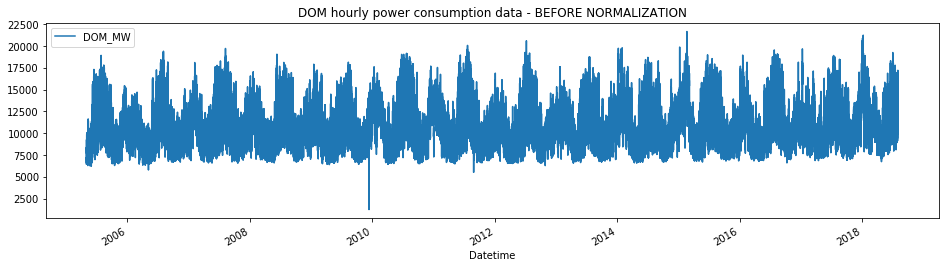

In [6]:
df.plot(figsize=(16,4),legend=True)

plt.title('DOM hourly power consumption data - BEFORE NORMALIZATION')

plt.show()

Normalize data

In [7]:
def norm_test(x):
    return (x-df['DOM_MW'].mean())/df['DOM_MW'].std()


In [8]:
df['DOM_MW']=norm_test(df['DOM_MW'])

In [9]:
df

,DOM_MW
Datetime,
2005-12-31 01:00:00,-0.646329
2005-12-31 02:00:00,-0.778478
2005-12-31 03:00:00,-0.807062
2005-12-31 04:00:00,-0.790077
2005-12-31 05:00:00,-0.752794
...,...
2018-01-01 20:00:00,3.094019
2018-01-01 21:00:00,3.155744
2018-01-01 22:00:00,3.048036


In [10]:
#def normalize_data(df):
#    scaler = sklearn.preprocessing.MinMaxScaler()
#    df['DOM_MW']=scaler.fit_transform(df['DOM_MW'].values.reshape(-1,1))
#    return df

#df = normalize_data(df)
#df.shape

Visualize data after normalization

In [11]:
#df.plot(figsize=(16,4),legend=True)

#plt.title('DOM hourly power consumption data - AFTER NORMALIZATION')

#plt.show()

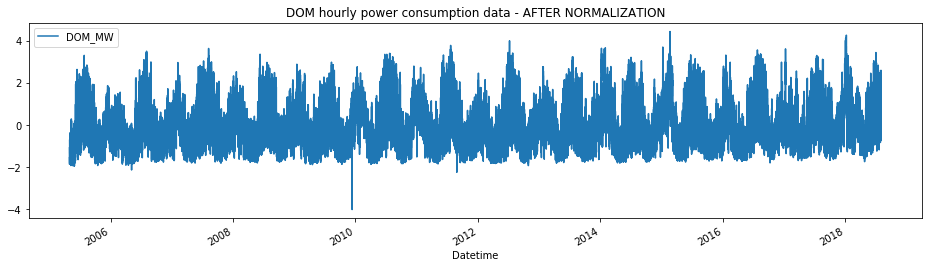

In [12]:
df.plot(figsize=(16,4),legend=True)

plt.title('DOM hourly power consumption data - AFTER NORMALIZATION')

plt.show()